In [354]:
import pandas as pd 
data_nyc=pd.read_csv('/Users/nayyar/Downloads/green_tripdata_2016-03.csv')
#setting variable to identify midtown location as pick up and laguardia as drop off
longitude_l=data_nyc['Dropoff_longitude'] <= -73.870
longitude_u=data_nyc['Dropoff_longitude'] > -73.879
latitude_l=data_nyc['Dropoff_latitude'] >= 40.770
latitude_u=data_nyc['Dropoff_latitude'] < 40.779
midtown_long_l=data_nyc['Pickup_longitude'] <= -73.950
midtown_long_u=data_nyc['Pickup_longitude'] > -74.00
midtown_lat_l=data_nyc['Pickup_latitude'] >= 40.72
midtown_lat_u=data_nyc['Pickup_latitude'] < 40.77
df=pd.DataFrame(data_nyc[latitude_l & latitude_u & longitude_u & longitude_l& midtown_long_l & midtown_long_u & midtown_lat_l & midtown_lat_u])
df.head()



,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
3199,2,2016-03-01 05:20:09,2016-03-01 05:33:23,N,1,-73.956047,40.747326,-73.872841,40.774246,1,...,22.0,0.5,0.5,3.00,0.0,NaN,0.3,26.30,1,1.0
3522,2,2016-03-01 06:05:10,2016-03-01 06:18:49,N,1,-73.956223,40.746128,-73.872826,40.774200,1,...,21.5,0.0,0.5,0.00,0.0,NaN,0.3,22.30,1,1.0
4518,2,2016-03-01 07:14:06,2016-03-01 07:28:28,N,1,-73.956741,40.730026,-73.873001,40.774265,2,...,22.0,0.0,0.5,4.56,0.0,NaN,0.3,27.36,1,1.0
5174,2,2016-03-01 07:44:05,2016-03-01 07:59:21,N,1,-73.956352,40.747135,-73.873215,40.774330,1,...,23.0,0.0,0.5,4.76,0.0,NaN,0.3,28.56,1,1.0
5975,1,2016-03-01 07:23:06,2016-03-01 07:39:28,N,1,-73.952843,40.733231,-73.872032,40.774376,1,...,24.5,0.0,0.5,5.05,0.0,NaN,0.3,30.35,1,1.0


In [356]:
#calculating trip time 
from datetime import datetime
import numpy as np
def trip_time(x,y):
    # first check whether the date in x and y are same or not
    # if same use same method as earlier
    tx_date = datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date()
    ty_date = datetime.strptime(y, '%Y-%m-%d %H:%M:%S').date()
    
    tx_date1 = str(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
    ty_date1 = str(datetime.strptime(y, '%Y-%m-%d %H:%M:%S').time())
    drop=tx_date1.split(':')
    
    pick=ty_date1.split(':')
    trip_length = 0.0
    #tx = datetime.datetime(x)
    #ty = datetime.datetime(y)
    if tx_date == ty_date:
        trip_length= (float(drop[0])*60 + float(drop[1]))-(float(pick[0])*60+float(pick[1]))
    
    if tx_date != ty_date :   
        trip_length= ((23- float(pick[0]))*60+ 60.0 - float(pick[1])) + (float(drop[0])*60 + 60*24 + float(drop[1]))
        
    # else return modified trip time 
    if trip_length >60:
        trip_length = 10
    return trip_length

df['trip_time'] = list(map(trip_time,df['Lpep_dropoff_datetime'],df['lpep_pickup_datetime']))
df['trip_time']



df.head()


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_time
3199,2,2016-03-01 05:20:09,2016-03-01 05:33:23,N,1,-73.956047,40.747326,-73.872841,40.774246,1,...,0.5,0.5,3.00,0.0,NaN,0.3,26.30,1,1.0,13.0
3522,2,2016-03-01 06:05:10,2016-03-01 06:18:49,N,1,-73.956223,40.746128,-73.872826,40.774200,1,...,0.0,0.5,0.00,0.0,NaN,0.3,22.30,1,1.0,13.0
4518,2,2016-03-01 07:14:06,2016-03-01 07:28:28,N,1,-73.956741,40.730026,-73.873001,40.774265,2,...,0.0,0.5,4.56,0.0,NaN,0.3,27.36,1,1.0,14.0
5174,2,2016-03-01 07:44:05,2016-03-01 07:59:21,N,1,-73.956352,40.747135,-73.873215,40.774330,1,...,0.0,0.5,4.76,0.0,NaN,0.3,28.56,1,1.0,15.0
5975,1,2016-03-01 07:23:06,2016-03-01 07:39:28,N,1,-73.952843,40.733231,-73.872032,40.774376,1,...,0.0,0.5,5.05,0.0,NaN,0.3,30.35,1,1.0,16.0


In [357]:
from datetime import datetime,date

df['hour']=(pd.to_datetime(df['Lpep_dropoff_datetime']).apply(lambda x: (x.hour + (x.minute/60))))
df['hour'].round()
df.head()


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,trip_time,hour
3199,2,2016-03-01 05:20:09,2016-03-01 05:33:23,N,1,-73.956047,40.747326,-73.872841,40.774246,1,...,0.5,3.00,0.0,NaN,0.3,26.30,1,1.0,13.0,5.550000
3522,2,2016-03-01 06:05:10,2016-03-01 06:18:49,N,1,-73.956223,40.746128,-73.872826,40.774200,1,...,0.5,0.00,0.0,NaN,0.3,22.30,1,1.0,13.0,6.300000
4518,2,2016-03-01 07:14:06,2016-03-01 07:28:28,N,1,-73.956741,40.730026,-73.873001,40.774265,2,...,0.5,4.56,0.0,NaN,0.3,27.36,1,1.0,14.0,7.466667
5174,2,2016-03-01 07:44:05,2016-03-01 07:59:21,N,1,-73.956352,40.747135,-73.873215,40.774330,1,...,0.5,4.76,0.0,NaN,0.3,28.56,1,1.0,15.0,7.983333
5975,1,2016-03-01 07:23:06,2016-03-01 07:39:28,N,1,-73.952843,40.733231,-73.872032,40.774376,1,...,0.5,5.05,0.0,NaN,0.3,30.35,1,1.0,16.0,7.650000


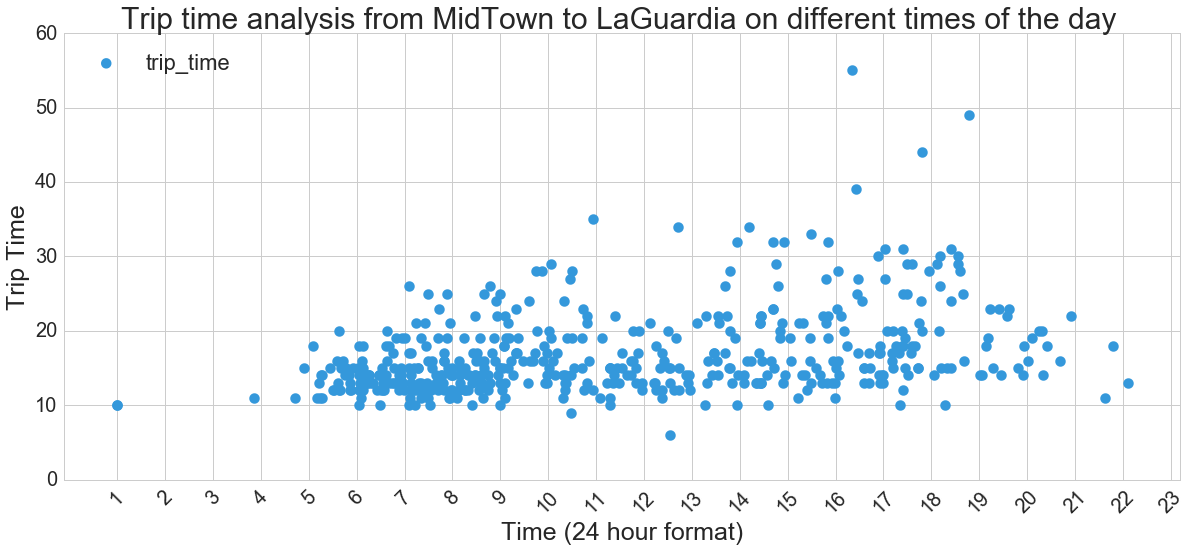

In [358]:


import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as pl
plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
x = df['hour']
xTicks =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
pl.xticks(x,xTicks)
pl.xticks(range(24), xTicks, rotation=45, size=20) #writes strings with 45 degree angle
pl.yticks(size=20)
pl.xlabel('Time (24 hour format)', size=25)
pl.ylabel('Trip Time', size=25)
p=pl.scatter(x,df['trip_time'],color="#3498db",linewidth=6)
pl.legend(loc=2,prop={'size':22})
pl.title('Trip time analysis from MidTown to LaGuardia on different times of the day ', size=30)

plt.savefig("Analysis_3.jpeg", bbox_inches='tight')
